<a href="https://colab.research.google.com/github/iftesha1/100_Days_Of_Coding_Challenge/blob/main/Day_70_Multivariate_Anomaly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import IsolationForest

from scipy import stats

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Copy of Superstore.xls")

In [5]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 2.6 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


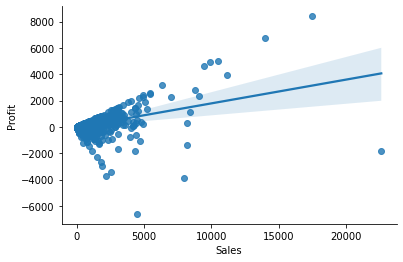

In [4]:
sns.regplot(x="Sales", y="Profit", data=df)
sns.despine();

In [5]:
minmax = MinMaxScaler(feature_range=(0, 1))
X = minmax.fit_transform(df[['Sales','Profit']])


In [11]:
clf = IsolationForest(n_estimators=100, contamination=0.01, random_state=0)
clf.fit(X)

# predict raw anomaly score
df['multivariate_anomaly_score'] = clf.decision_function(X)
        
# prediction of a datapoint category outlier or inlier
df['multivariate_outlier'] = clf.predict(X)


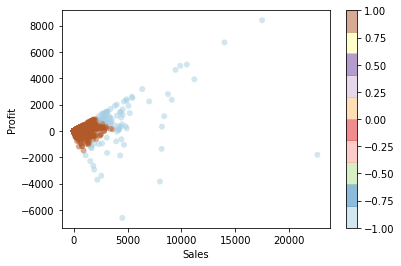

In [7]:
plt.scatter(df['Sales'], df['Profit'],
            c=df.multivariate_outlier, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Paired', 10))
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.colorbar();

### Visually investigate some of the anomalies

We may want to investigate each of the outliers that determined by our model and try to understand what make them anomalies.

In [13]:
clf.fit(df['Sales'].values.reshape(-1, 1))
df['anomaly_score_univariate_sales'] = clf.decision_function(df['Sales'].values.reshape(-1, 1))
df['outlier_univariate_sales'] = clf.predict(df['Sales'].values.reshape(-1, 1))

In [15]:
clf.fit(df['Profit'].values.reshape(-1, 1))
df['anomaly_score_univariate_profit'] = clf.decision_function(df['Profit'].values.reshape(-1, 1))
df['outlier_univariate_profit'] = clf.predict(df['Profit'].values.reshape(-1, 1))

In [16]:
df[(df['outlier_univariate_sales'] == 1) & (df['outlier_univariate_profit'] == 1) & (df['multivariate_outlier'] == -1)]


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sales,Quantity,Discount,Profit,multivariate_anomaly_score,multivariate_outlier,anomaly_score_univariate_sales,outlier_univariate_sales,anomaly_score_univariate_profit,outlier_univariate_profit
1001,1002,CA-2015-124891,2015-07-31,2015-07-31,Same Day,RH-19495,Rick Hansen,Consumer,United States,New York City,...,2309.65,7,0.0,762.1845,-0.003494,-1,0.010160,1,0.000583,1
5530,5531,CA-2017-160885,2017-12-02,2017-12-06,Standard Class,JK-16090,Juliana Krohn,Consumer,United States,Omaha,...,2479.96,4,0.0,743.9880,-0.010036,-1,0.000071,1,0.002117,1
